 ## 用到的包
 * python:3.7.11
 * geopandas :0.9.0
 * shapely:1.7.1
 * fiona:1.8.13 post1
 * gdal:3.0.2
 * pyproj: 2.6.1 post1
 ## 可能遇到的问题
 * SQL版本不匹配：是pyproj版本的问题，需要重新安装pyproj,玄学问题
 * 找不到pyproj:可能是conda安装的问题，我的解决思路是卸了重装

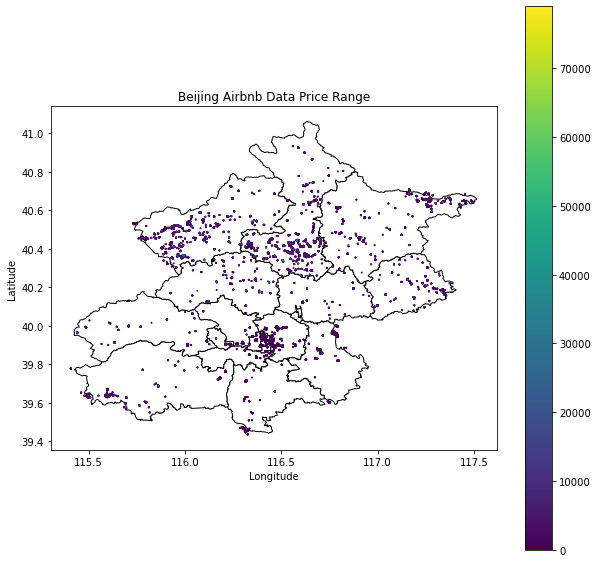

In [3]:

import numpy as np
import geopandas as gp

import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

file_path="../latex/tex/figures/"
# 北京房价地理信息展示部分
geojs = gp.read_file('110000.json')

df = pd.read_csv('Beijing-result-2022-06-21.csv')
df = df[['latitude','longitude','adjusted_price']]

df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)



gdf = gp.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth = 1, figsize=(10,10))

gdf.plot(ax=base, marker='o', column='adjusted_price', markersize=1, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Beijing Airbnb Data Price Range')
plt.savefig(file_path+ '地理-房价.png', bbox_inches='tight',dpi=300)

plt.show();


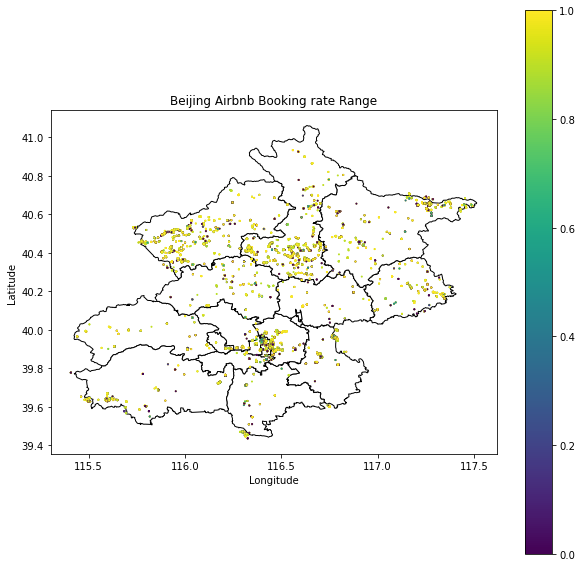

In [5]:
# 北京预订率地理信息展示部分
geojs = gp.read_file('110000.json')

df = pd.read_csv('Beijing-result-2022-06-21.csv')
df = df[['latitude','longitude','notavailable']]

df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)



gdf = gp.GeoDataFrame(df, geometry='coords')

base = geojs.plot(color='white', edgecolor='black', linewidth = 1, figsize=(10,10))

gdf.plot(ax=base, marker='o', column='notavailable', markersize=1, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Beijing Airbnb Booking rate Range')
plt.savefig(file_path+'地理-预订率.png', bbox_inches='tight',dpi=300)

plt.show();


